# Proyek Klasifikasi Kondisi Udara Jakarta

Dataset ini berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021

Penjelasan variabel dari data diatas sebagai berikut :

1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. pm25 : Partikulat salah satu parameter yang diukur
5. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
6. co : Carbon Monoksida salah satu parameter yand diukur
7. o3 : Ozon salah satu parameter yang diukur
8. no2 : NItrogen dioksida salah satu parameter yang diukur
9. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
10. critical : Parameter yang hasil pengukurannya paling tinggi
11. categori : Kategori hasil perhitungan indeks standar pencemaran udara


In [166]:
def range_to_cat(x):
    if x >300 :
        return 5 #hazardous
    elif x>200:
        return 4 #unhealty
    elif x >100:
        return 3 #unhealthy for sensitive groups
    elif x>50:
        return 2 # moderate
    return 1 # good

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')

df_weather = pd.read_csv('weather_data.csv',parse_dates = ['time'],index_col = 'time')
df_aqi = pd.read_csv('AQI_data.csv',parse_dates = ['time'],index_col = 'time')
combined_data = pd.concat([df_weather,df_aqi],axis = 1)
combined_data['us_aqi'] = combined_data['us_aqi'].apply(lambda x : range_to_cat(x))
combined_data.head()

,temperature_2m,relativehumidity,windspeed_10m,winddirection_10m,is_day,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index,us_aqi
time,,,,,,,,,,,,,
2022-08-06 00:00:00,23.6,94,3.8,253,0,86.4,59.6,2370,132.0,39.2,30,0.0,3
2022-08-06 01:00:00,23.3,95,4.0,265,0,95.7,66.1,2526,135.6,40.9,30,0.0,3
2022-08-06 02:00:00,23.6,93,3.6,264,0,99.9,69.2,2523,131.6,43.1,31,0.0,3
2022-08-06 03:00:00,23.0,95,3.2,270,0,98.0,68.2,2453,123.7,45.6,31,0.0,3
2022-08-06 04:00:00,22.7,96,4.0,270,0,96.9,67.1,2389,113.7,48.5,34,0.0,3


In [168]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10344 entries, 2022-08-06 00:00:00 to 2023-10-10 23:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature_2m     10344 non-null  float64
 1   relativehumidity   10344 non-null  int64  
 2   windspeed_10m      10344 non-null  float64
 3   winddirection_10m  10344 non-null  int64  
 4   is_day             10344 non-null  int64  
 5   pm10               10344 non-null  float64
 6   pm2_5              10344 non-null  float64
 7   carbon_monoxide    10344 non-null  int64  
 8   nitrogen_dioxide   10344 non-null  float64
 9   sulphur_dioxide    10344 non-null  float64
 10  ozone              10344 non-null  int64  
 11  uv_index           10344 non-null  float64
 12  us_aqi             10344 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 1.1 MB


In [169]:
combined_data.describe()

,temperature_2m,relativehumidity,windspeed_10m,winddirection_10m,is_day,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index,us_aqi
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,26.604727,80.390951,6.422129,186.223995,0.503384,70.926904,48.150648,2007.468097,72.583217,31.029660,86.222544,1.741638,2.700696
std,2.256918,11.656244,3.719789,96.031317,0.500013,39.668958,27.504340,1387.205596,48.100388,15.574052,85.058163,2.726383,0.497441
min,21.700000,38.000000,0.000000,1.000000,0.000000,0.500000,0.400000,58.000000,0.000000,0.200000,0.000000,0.000000,1.000000
25%,24.700000,73.000000,3.700000,107.000000,0.000000,40.700000,27.200000,977.000000,37.500000,18.800000,29.000000,0.000000,2.000000
50%,26.200000,83.000000,5.400000,202.000000,1.000000,65.000000,43.700000,1654.500000,60.700000,29.100000,51.000000,0.000000,3.000000
75%,28.300000,90.000000,8.400000,260.000000,1.000000,92.200000,62.900000,2672.000000,95.900000,40.800000,120.000000,2.850000,3.000000
max,34.000000,100.000000,22.100000,360.000000,1.000000,269.200000,186.700000,10796.000000,312.500000,135.600000,528.000000,12.950000,4.000000


In [170]:
combined_data.describe()

,temperature_2m,relativehumidity,windspeed_10m,winddirection_10m,is_day,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index,us_aqi
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,26.604727,80.390951,6.422129,186.223995,0.503384,70.926904,48.150648,2007.468097,72.583217,31.029660,86.222544,1.741638,2.700696
std,2.256918,11.656244,3.719789,96.031317,0.500013,39.668958,27.504340,1387.205596,48.100388,15.574052,85.058163,2.726383,0.497441
min,21.700000,38.000000,0.000000,1.000000,0.000000,0.500000,0.400000,58.000000,0.000000,0.200000,0.000000,0.000000,1.000000
25%,24.700000,73.000000,3.700000,107.000000,0.000000,40.700000,27.200000,977.000000,37.500000,18.800000,29.000000,0.000000,2.000000
50%,26.200000,83.000000,5.400000,202.000000,1.000000,65.000000,43.700000,1654.500000,60.700000,29.100000,51.000000,0.000000,3.000000
75%,28.300000,90.000000,8.400000,260.000000,1.000000,92.200000,62.900000,2672.000000,95.900000,40.800000,120.000000,2.850000,3.000000
max,34.000000,100.000000,22.100000,360.000000,1.000000,269.200000,186.700000,10796.000000,312.500000,135.600000,528.000000,12.950000,4.000000


In [171]:
(combined_data.isna().sum() * 100) / len(combined_data)

temperature_2m       0.0
relativehumidity     0.0
windspeed_10m        0.0
winddirection_10m    0.0
is_day               0.0
pm10                 0.0
pm2_5                0.0
carbon_monoxide      0.0
nitrogen_dioxide     0.0
sulphur_dioxide      0.0
ozone                0.0
uv_index             0.0
us_aqi               0.0
dtype: float64

In [172]:
combined_data.duplicated().sum()

0

# Exploratory Data Analysis

<Axes: xlabel='count', ylabel='us_aqi'>

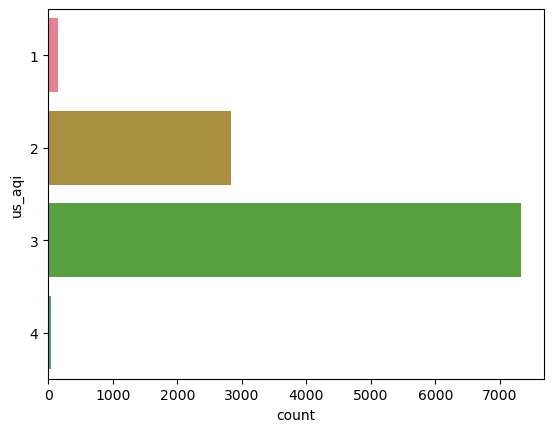

In [173]:
sns.countplot(data = combined_data, y = 'us_aqi')

Kebanyakan kategori polusi pada data adalah berkategori 3, dimana keadaan polusi di jakarta tidak sehat untuk kelompok yang sensitif seperti lansia. Selain itu juga, proporsi kategori pada data ini tidak seimbang. Proporsi kategori yang tidak seimbang menyebabkan hasil klasifikasi pada mesin belajar menjadi bias, oleh karena itu perlu dilakukan oversampling untuk menyeimbangkan proporsi data ini.

## Station Distribution

<Axes: xlabel='is_day', ylabel='count'>

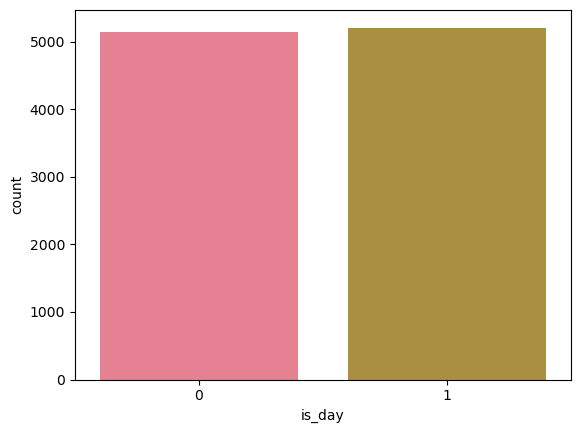

In [174]:
sns.countplot(data = combined_data, x = 'is_day')

Data pada kolom is_day seimbang.

## Numerical Distribution 

array([[<Axes: title={'center': 'temperature_2m'}>,
        <Axes: title={'center': 'relativehumidity'}>,
        <Axes: title={'center': 'windspeed_10m'}>,
        <Axes: title={'center': 'winddirection_10m'}>],
       [<Axes: title={'center': 'is_day'}>,
        <Axes: title={'center': 'pm10'}>,
        <Axes: title={'center': 'pm2_5'}>,
        <Axes: title={'center': 'carbon_monoxide'}>],
       [<Axes: title={'center': 'nitrogen_dioxide'}>,
        <Axes: title={'center': 'sulphur_dioxide'}>,
        <Axes: title={'center': 'ozone'}>,
        <Axes: title={'center': 'uv_index'}>],
       [<Axes: title={'center': 'us_aqi'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

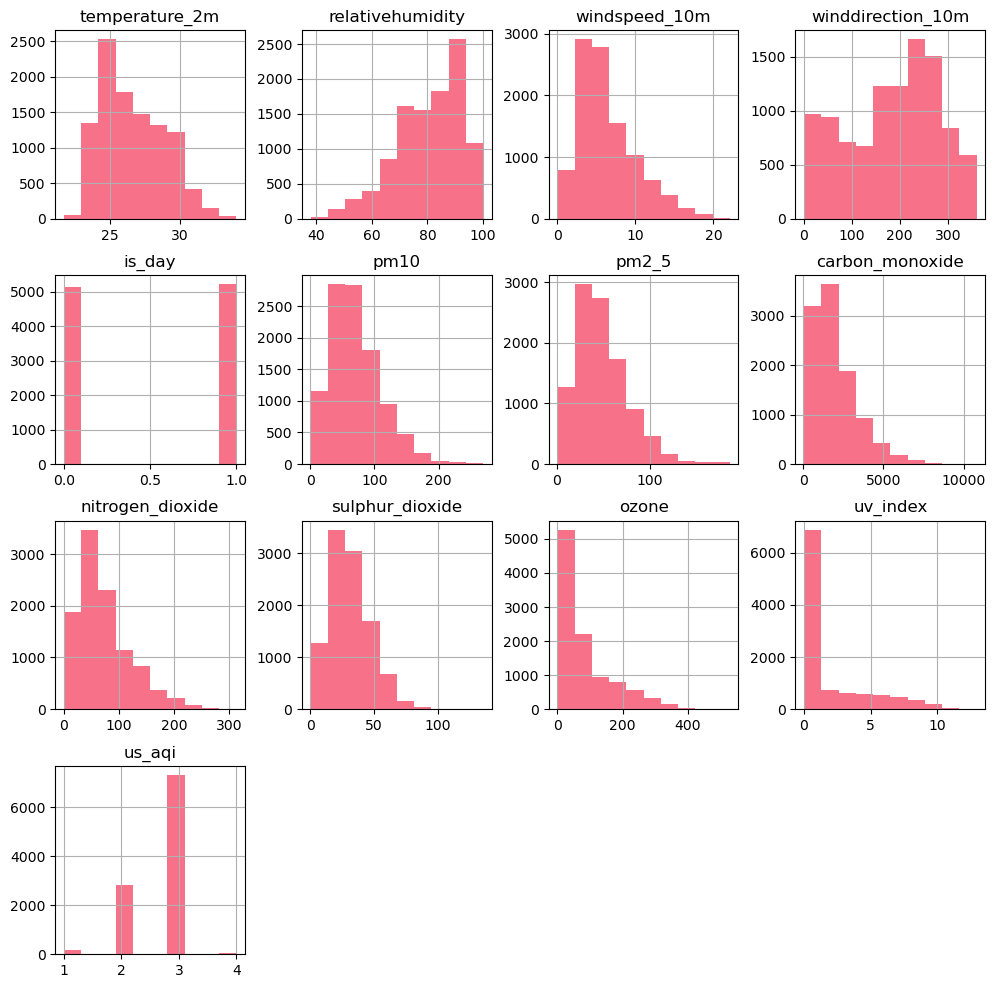

In [175]:
combined_data.hist(figsize = (12,12))

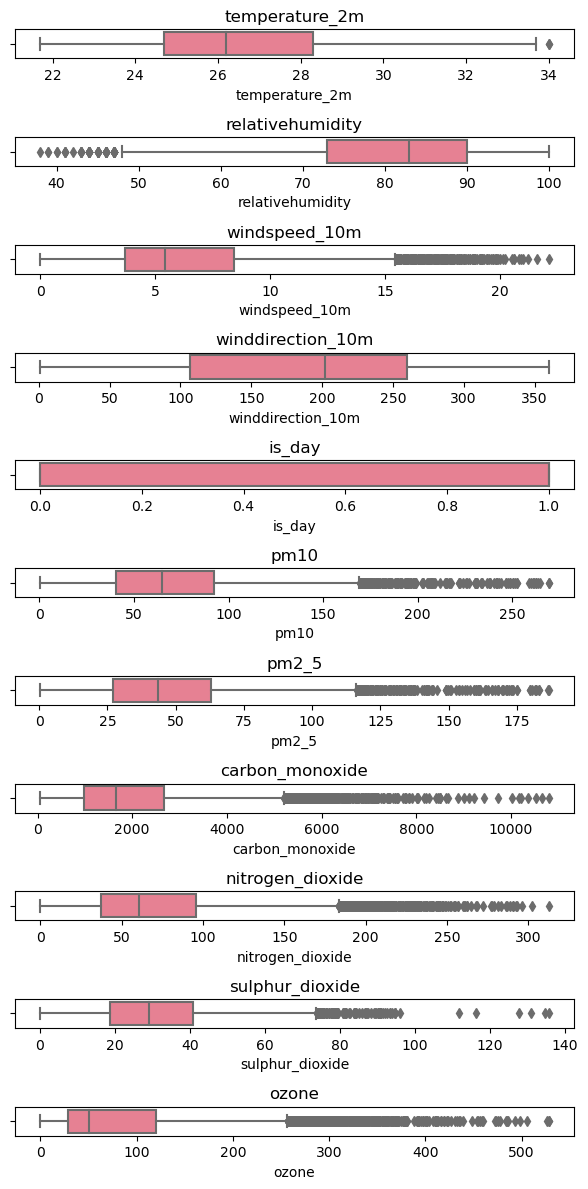

In [185]:
fig,axes = plt.subplots(11,1,figsize = (6,12))

select_num = combined_data.select_dtypes(include = ['number']).columns.tolist()

for i in range(11):
    sns.boxplot(x = combined_data[select_num[i]], ax = axes[i]).set_title(f'{select_num[i]}')
    
fig.tight_layout()

Dari boxplot diatas, ditemukan banyak outlier pada data-data kandungan polusi udara.

## Pertumbuhan Setiap Hari 

In [177]:
def trend_analysis(data):
    fig,axes = plt.subplots(4,3,figsize = (25,12))
    cols = data.columns.to_list()
    
    for i in range(len(cols)):
        x = data.index.astype('int64')
        y = data[cols[i]]
        
        m,b = np.polyfit(x,y,1)
        
        sns.lineplot(x= data.index,y = data[cols[i]],label = cols[i], ax = axes[i // 3, i % 3])
        axes[i // 3, i % 3].plot(data.index,x*m + b,color = 'blue')
        axes[i // 3, i % 3].legend()

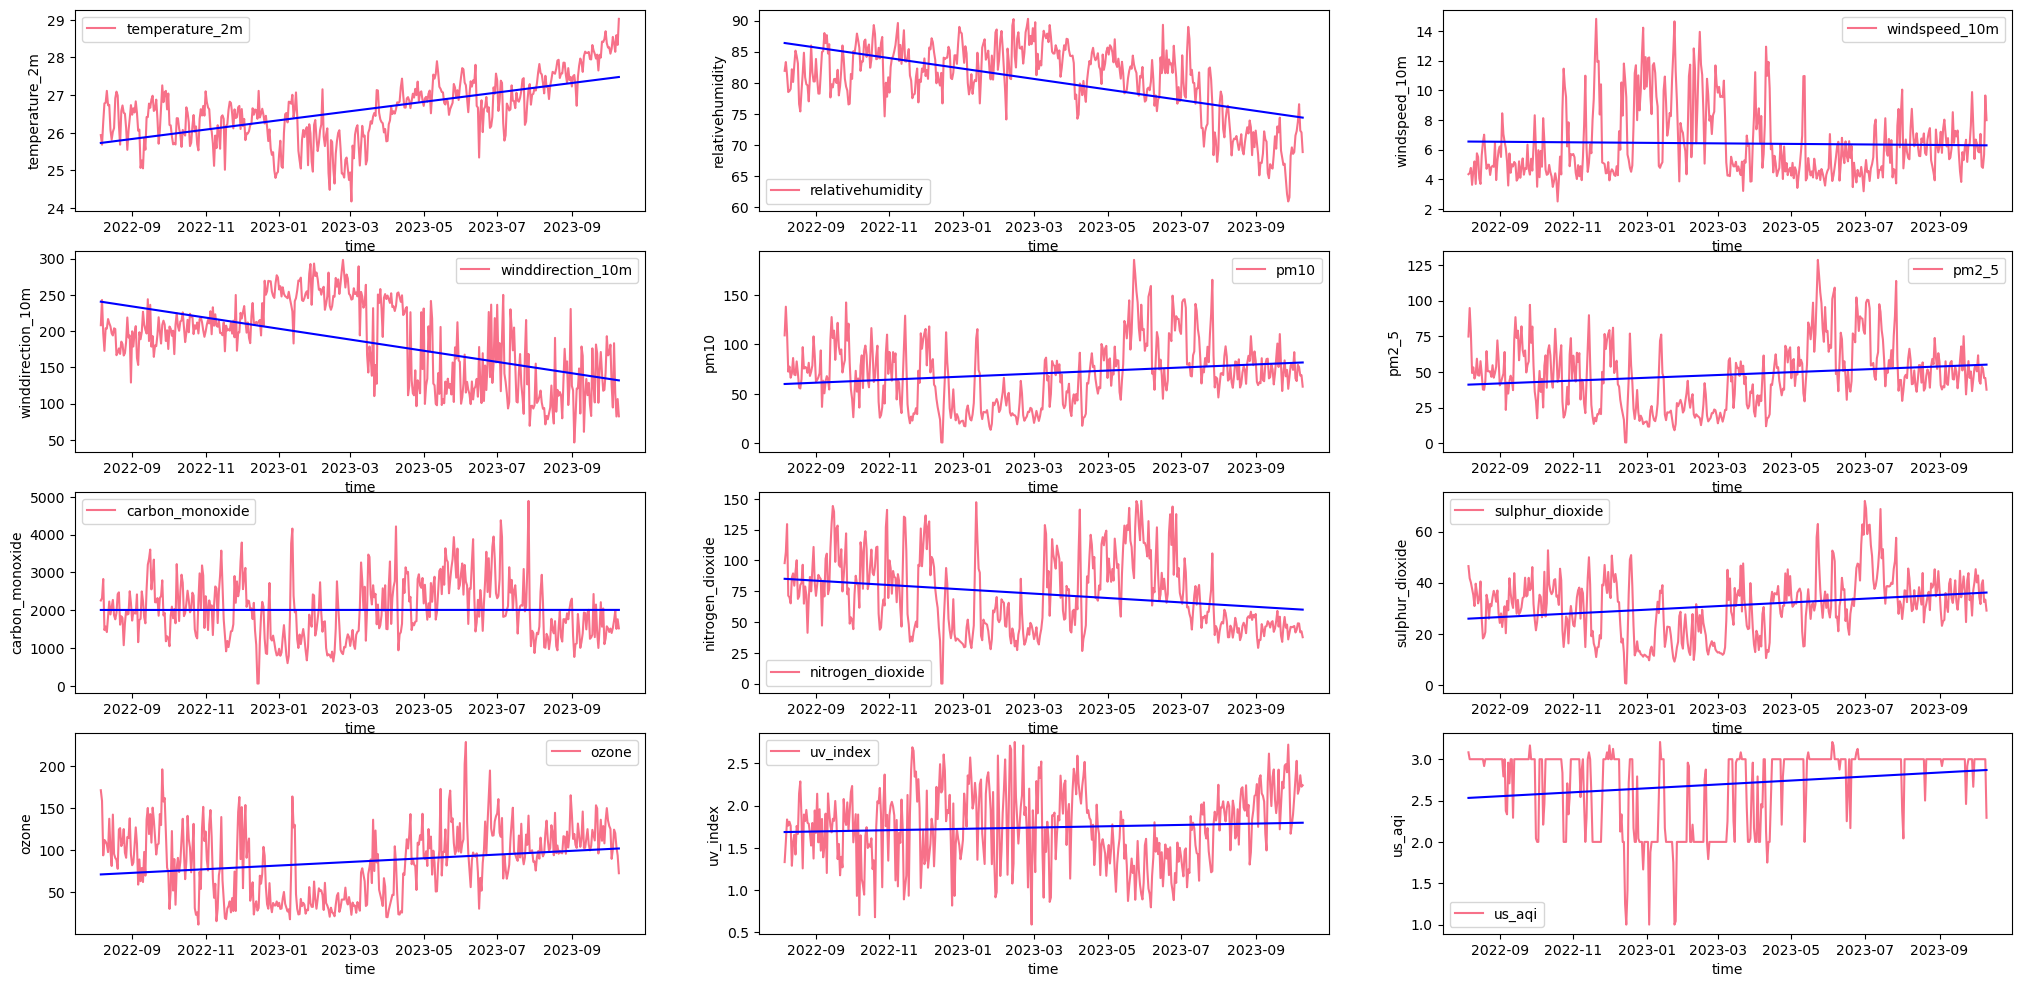

In [178]:
trend_analysis(for_plot_data.resample('D').mean())

Berdasarkan timeseries diatas, variabel yang trennya naik secara signifikan adalah temperatur. Sementara itu, arah angin dan kelembapan trennya menurun tiap tahun.

# Pengaruh Siang dan Malam

<Axes: xlabel='is_day', ylabel='count'>

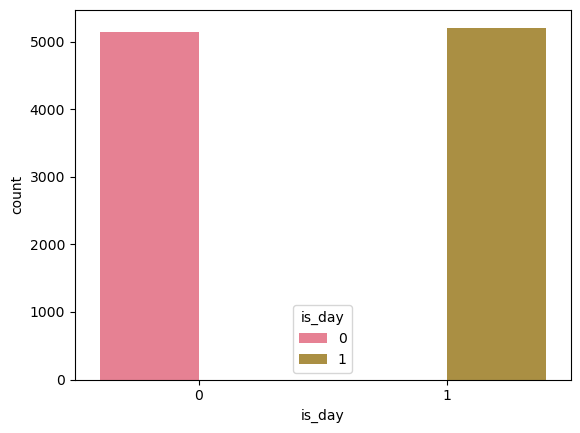

In [179]:
sns.countplot(data = combined_data, x = 'is_day', hue = 'is_day')

In [ ]:
combined_data.resample('')

## Korelasi

<Axes: >

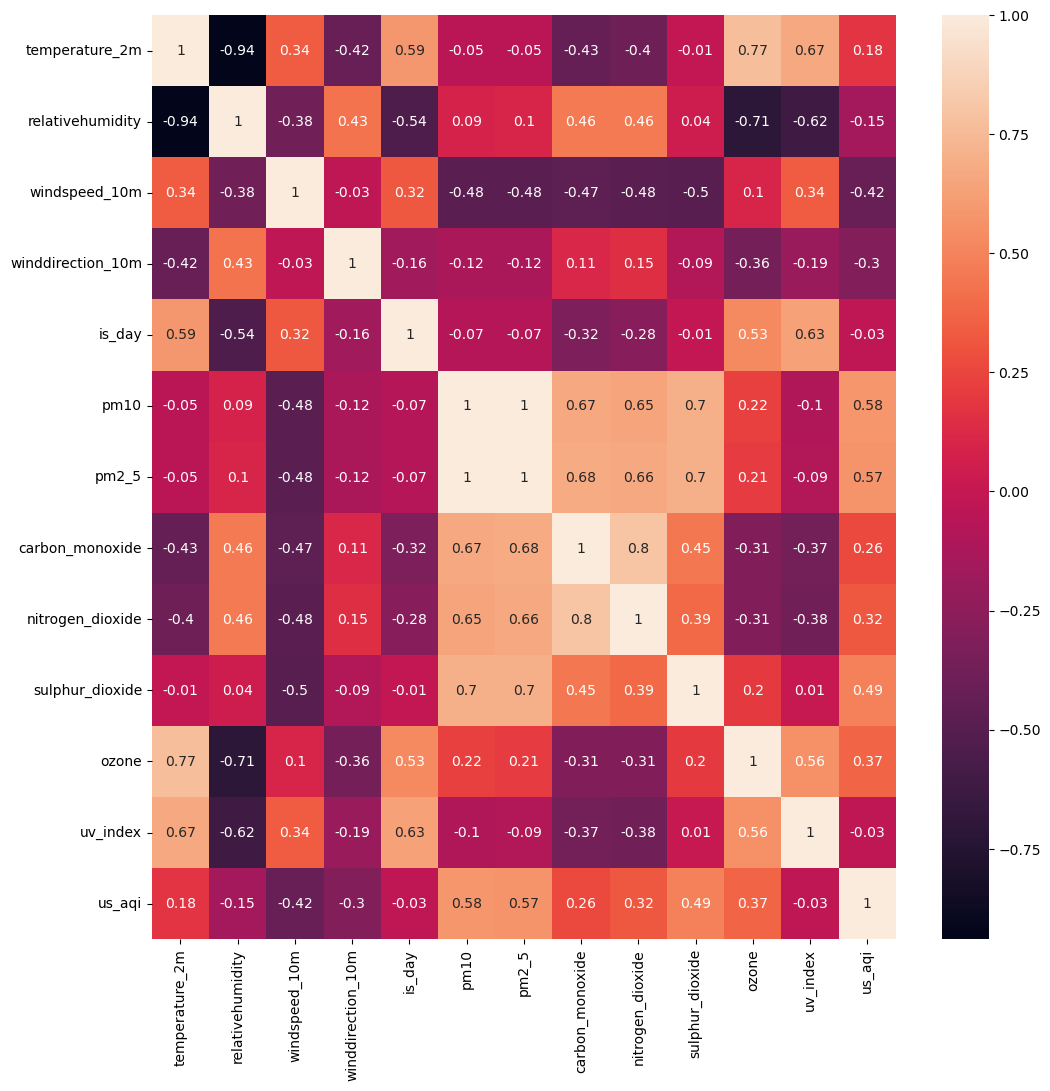

In [180]:
corr = combined_data.corr(numeric_only = True).round(2)
fig,ax = plt.subplots(1,figsize = (12,12))
sns.heatmap(corr,annot = True, ax = ax)

<Axes: >

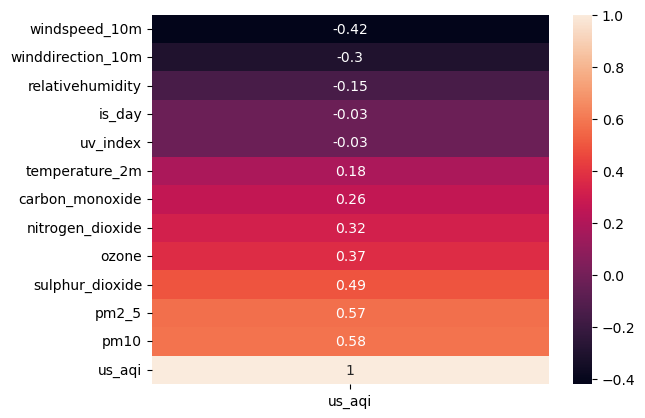

In [181]:
sns.heatmap(corr[['us_aqi']].sort_values(by = 'us_aqi').round(2),annot = True)

<Axes: >

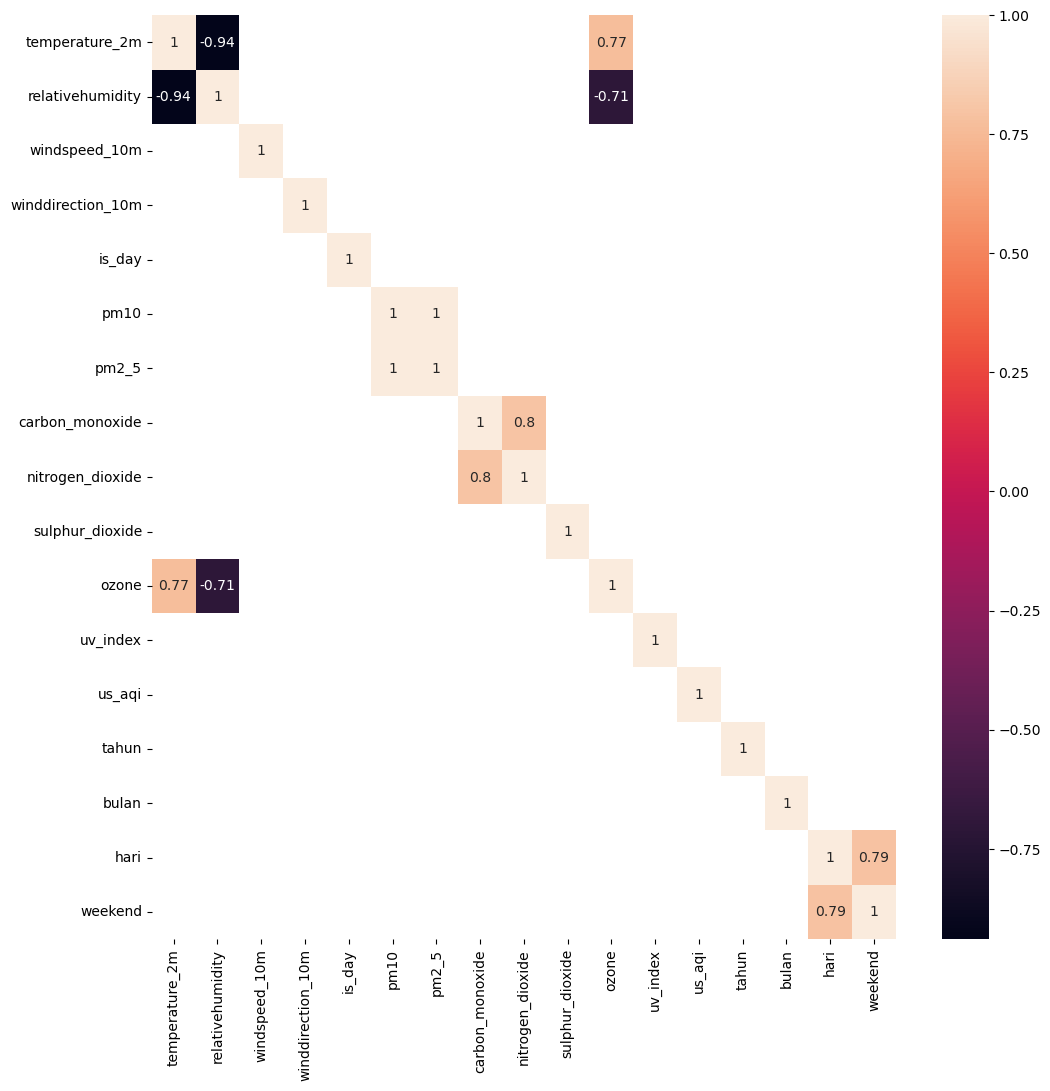

In [150]:
fig,ax = plt.subplots(1,figsize = (12,12))
sns.heatmap(corr[(corr < -0.7) | (corr > 0.7)],annot = True,ax = ax)